## 1. Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Utilities
import warnings
import os
from datetime import datetime

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Dataset

In [3]:
# Load data
data_path = '../data/raw/ecommerce_data.csv'
df = pd.read_csv(data_path)

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"\nColumns: {df.columns.tolist()}")

DATASET OVERVIEW
Shape: 5,630 rows × 20 columns
Memory usage: 2.40 MB

Columns: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [4]:
# Display first few rows
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000,Mobile Phone,3,6.000,Debit Card,Female,3.000,3,Laptop & Accessory,2,Single,9,1,11.000,1.000,1.000,5.000,159.930
1,50002,1,NaN,Phone,1,8.000,UPI,Male,3.000,4,Mobile,3,Single,7,1,15.000,0.000,1.000,0.000,120.900
2,50003,1,NaN,Phone,1,30.000,Debit Card,Male,2.000,4,Mobile,3,Single,6,1,14.000,0.000,1.000,3.000,120.280
3,50004,1,0.000,Phone,3,15.000,Debit Card,Male,2.000,4,Laptop & Accessory,5,Single,8,0,23.000,0.000,1.000,3.000,134.070
4,50005,1,0.000,Phone,1,12.000,CC,Male,NaN,3,Mobile,5,Single,3,0,11.000,1.000,1.000,3.000,129.600


In [5]:
# Data info
print("\nData Types and Non-Null Counts:")
df.info()


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null 

In [6]:
# Statistical summary
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000,5630.000,5366.000,5630.000,5379.000,5375.000,5630.000,5630.000,5630.000,5630.000,5365.000,5374.000,5372.000,5323.000,5630.000
mean,52815.500,0.168,10.190,1.655,15.640,2.932,3.689,3.067,4.214,0.285,15.708,1.751,3.008,4.543,177.223
std,1625.385,0.374,8.557,0.915,8.531,0.722,1.024,1.380,2.584,0.451,3.675,1.895,2.940,3.654,49.207
min,50001.000,0.000,0.000,1.000,5.000,0.000,1.000,1.000,1.000,0.000,11.000,0.000,1.000,0.000,0.000
25%,51408.250,0.000,2.000,1.000,9.000,2.000,3.000,2.000,2.000,0.000,13.000,1.000,1.000,2.000,145.770
50%,52815.500,0.000,9.000,1.000,14.000,3.000,4.000,3.000,3.000,0.000,15.000,1.000,2.000,3.000,163.280
75%,54222.750,0.000,16.000,3.000,20.000,3.000,4.000,4.000,6.000,1.000,18.000,2.000,3.000,7.000,196.393
max,55630.000,1.000,61.000,3.000,127.000,5.000,6.000,5.000,22.000,1.000,26.000,16.000,16.000,46.000,324.990


## 3. Data Quality Check

MISSING VALUES ANALYSIS

 Found 7 columns with missing values:

                     Column  Missing_Count  Missing_Percentage
          DaySinceLastOrder            307               5.453
OrderAmountHikeFromlastYear            265               4.707
                     Tenure            264               4.689
                 OrderCount            258               4.583
                 CouponUsed            256               4.547
             HourSpendOnApp            255               4.529
            WarehouseToHome            251               4.458


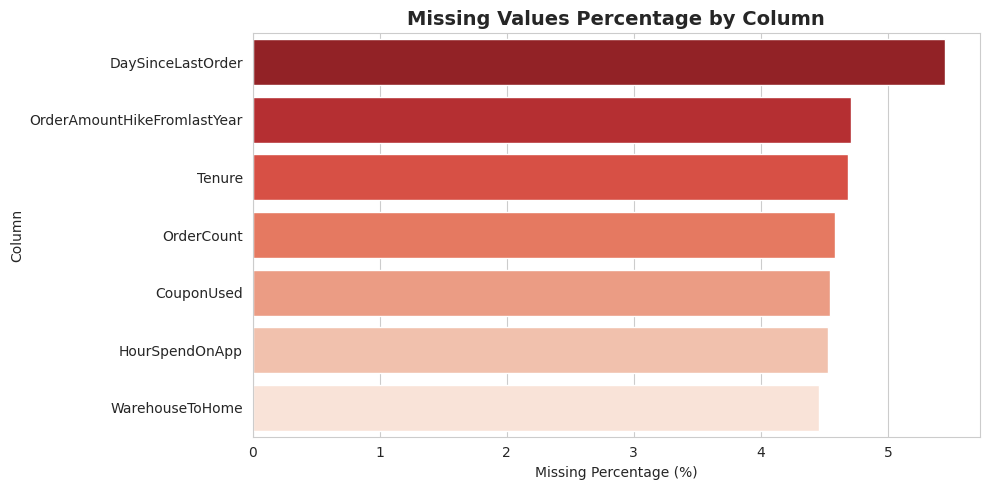

In [7]:
# Check for missing values
print("="*70)
print("MISSING VALUES ANALYSIS")
print("="*70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"\n Found {len(missing_df)} columns with missing values:\n")
    print(missing_df.to_string(index=False))
    
    # Visualize missing values
    plt.figure(figsize=(10, 5))
    sns.barplot(data=missing_df, x='Missing_Percentage', y='Column', palette='Reds_r')
    plt.title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Missing Percentage (%)')
    plt.ylabel('Column')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

In [8]:
# Check for duplicates
print("\n" + "="*70)
print("DUPLICATE CHECK")
print("="*70)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates:,}")

if duplicates > 0:
    print(f"Found {duplicates} duplicate rows!")
    print("\nDuplicate rows:")
    print(df[df.duplicated()])
else:
    print("No duplicate rows found!")

# Check for duplicate CustomerIDs
duplicate_ids = df['CustomerID'].duplicated().sum()
print(f"\nDuplicate CustomerIDs: {duplicate_ids:,}")
if duplicate_ids > 0:
    print("Warning: Found duplicate customer IDs!")


DUPLICATE CHECK
Number of duplicate rows: 0
No duplicate rows found!

Duplicate CustomerIDs: 0


## 4. Handle Missing Values

In [21]:
# Create a copy for preprocessing
df_clean = df.copy()

print("="*70)
print("HANDLING MISSING VALUES")
print("="*70)

# Strategy for each column with missing values
missing_strategies = {
    'Tenure': 'median',
    'WarehouseToHome': 'median',
    'HourSpendOnApp': 'median',
    'OrderAmountHikeFromlastYear': 'median',
    'CouponUsed': 'median',
    'OrderCount': 'median',
    'DaySinceLastOrder': 'median'
}

# Apply imputation
for col, strategy in missing_strategies.items():
    if col in df_clean.columns:
        before = df_clean[col].isnull().sum()
        
        if strategy == 'median':
            value = df_clean[col].median()
            df_clean[col].fillna(value, inplace=True)
            print(f"{col:30s} | Filled {before:4d} values with median: {value:.2f}")

# Verify no missing values remain
remaining_missing = df_clean.isnull().sum().sum()
print(f"\n{'='*70}")
if remaining_missing == 0:
    print("All missing values handled successfully!")
else:
    print(f"Still have {remaining_missing} missing values")

HANDLING MISSING VALUES
Tenure                         | Filled  264 values with median: 9.00
WarehouseToHome                | Filled  251 values with median: 14.00
HourSpendOnApp                 | Filled  255 values with median: 3.00
OrderAmountHikeFromlastYear    | Filled  265 values with median: 15.00
CouponUsed                     | Filled  256 values with median: 1.00
OrderCount                     | Filled  258 values with median: 2.00
DaySinceLastOrder              | Filled  307 values with median: 3.00

All missing values handled successfully!


## 5. Handle Outliers

In [12]:
# Identify numerical columns
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('CustomerID')
numerical_cols.remove('Churn')

print("="*70)
print("OUTLIER DETECTION (IQR Method)")
print("="*70)
print(f"\nAnalyzing {len(numerical_cols)} numerical columns...\n")

outlier_info = []

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df_clean)) * 100
    
    outlier_info.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': f"{outlier_pct:.2f}%"
    })

outlier_df = pd.DataFrame(outlier_info)
outlier_df = outlier_df[outlier_df['Outlier_Count'] > 0].sort_values('Outlier_Count', ascending=False)

if len(outlier_df) > 0:
    print(outlier_df.to_string(index=False))
    print(f"\nNote: Outliers detected but NOT removed")
else:
    print("No significant outliers detected!")

OUTLIER DETECTION (IQR Method)

Analyzing 13 numerical columns...

                     Column  Outlier_Count Outlier_Percentage
                 OrderCount            703             12.49%
                 CouponUsed            629             11.17%
             CashbackAmount            438              7.78%
   NumberOfDeviceRegistered            397              7.05%
          DaySinceLastOrder             62              1.10%
OrderAmountHikeFromlastYear             33              0.59%
             HourSpendOnApp              6              0.11%
                     Tenure              4              0.07%
            NumberOfAddress              4              0.07%
            WarehouseToHome              2              0.04%

Note: Outliers detected but NOT removed


## 6. Feature Engineering

In [14]:
print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

# Create new features
df_clean['EngagementScore'] = (df_clean['HourSpendOnApp'] * 0.3 + df_clean['OrderCount'] * 0.7)
print("Created: EngagementScore")

df_clean['AvgOrderValue'] = df_clean['CashbackAmount'] / (df_clean['OrderCount'] + 1)
print("Created: AvgOrderValue")

df_clean['LoyaltyScore'] = (df_clean['Tenure'] * 0.3 + df_clean['SatisfactionScore'] * 20 * 0.3 + df_clean['OrderCount'] * 10 * 0.4)
print("Created: LoyaltyScore")

df_clean['RecencyScore'] = 100 - df_clean['DaySinceLastOrder']
df_clean['RecencyScore'] = df_clean['RecencyScore'].clip(lower=0)
print("Created: RecencyScore")

df_clean['DiscountDependency'] = df_clean['CouponUsed'] / (df_clean['OrderCount'] + 1)
print("Created: DiscountDependency")

print(f"\nCreated 5 new features!")
print(f"Total features now: {len(df_clean.columns)}")

FEATURE ENGINEERING
Created: EngagementScore
Created: AvgOrderValue
Created: LoyaltyScore
Created: RecencyScore
Created: DiscountDependency

Created 5 new features!
Total features now: 25


## 7. Encoding Categorical Variables

In [17]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print("="*70)
print("ENCODING CATEGORICAL VARIABLES")
print("="*70)
print(f"\nFound {len(categorical_cols)} categorical columns")

# Label Encoding
label_encode_cols = ['Gender', 'MaritalStatus']
label_encoders = {}

for col in label_encode_cols:
    if col in df_clean.columns:
        le = LabelEncoder()
        df_clean[f'{col}_Encoded'] = le.fit_transform(df_clean[col])
        label_encoders[col] = le
        print(f"{col}: {col}_Encoded")

# One-Hot Encoding
onehot_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat']

for col in onehot_cols:
    if col in df_clean.columns:
        dummies = pd.get_dummies(df_clean[col], prefix=col, drop_first=True)
        df_clean = pd.concat([df_clean, dummies], axis=1)
        print(f"{col}: {len(dummies.columns)} dummy variables")

print(f"\nTotal columns: {len(df_clean.columns)}")

ENCODING CATEGORICAL VARIABLES

Found 5 categorical columns
Gender: Gender_Encoded
MaritalStatus: MaritalStatus_Encoded
PreferredLoginDevice: 2 dummy variables
PreferredPaymentMode: 6 dummy variables
PreferedOrderCat: 5 dummy variables

Total columns: 66


## 8. Feature Scaling

In [19]:
scale_cols = [
    'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
    'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount',
    'EngagementScore', 'AvgOrderValue', 'LoyaltyScore', 'RecencyScore', 'DiscountDependency'
]

print("="*70)
print("FEATURE SCALING (StandardScaler)")
print("="*70)

scaler = StandardScaler()
df_clean[scale_cols] = scaler.fit_transform(df_clean[scale_cols])

print(f"Scaled {len(scale_cols)} numerical features")

FEATURE SCALING (StandardScaler)
Scaled 17 numerical features


## 9. Save Preprocessed Data

In [20]:
import joblib

# Save cleaned data
output_dir = '../data/processed/'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'ecommerce_data_cleaned.csv')
df_clean.to_csv(output_file, index=False)

# Save preprocessing objects
model_dir = '../data/model/'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(scaler, os.path.join(model_dir, 'scaler.pkl'))
joblib.dump(label_encoders, os.path.join(model_dir, 'label_encoders.pkl'))

print("="*70)
print("SAVE COMPLETE")
print("="*70)
print(f"Cleaned data: {output_file}")
print(f"Shape: {df_clean.shape}")
print(f"Preprocessing objects saved")
print(f"\nData Preprocessing Complete!")

SAVE COMPLETE
Cleaned data: ../data/processed/ecommerce_data_cleaned.csv
Shape: (5630, 66)
Preprocessing objects saved

Data Preprocessing Complete!
